In [1]:
#importing libraries
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Loading the data
eng = pd.read_csv("../data/raw/sampled_imdb_en.csv")
spa = pd.read_csv("../data/raw/sampled_imdb_es.csv")

eng["language"] = "english"
spa["language"] = "spanish"

print(eng.head())
print("\n")
print(spa.head())

                                              review sentiment language
0  Feh. This movie started out in an interesting ...  negative  english
1  Crackerjack is a simple but feelgood movie whe...  positive  english
2  This star-studded British/Spanish co-productio...  negative  english
3  My wife, Kate and I absolutely loved the serie...  positive  english
4  Unfortunately, this film is typical of the wat...  negative  english


                                           review_es sentiment language
0  Feh. Esta película comenzó de una manera inter...  negative  spanish
1  Crackerjack es una película sencilla pero feel...  positive  spanish
2  Esta coproducción británica / española de estr...  negative  spanish
3  Mi esposa, Kate y yo nos encantó la serie y no...  positive  spanish
4  Desafortunadamente, esta película es típica de...  negative  spanish


In [3]:
#cleaning the dataset from any unwanted charecters and making all letters are lowercase
def clean_text(text):
    text = str(text).lower()                       # convert all letter to lowercase
    text = re.sub(r'[-/]', ' ', text)              # Replace hyphens and slashes with spaces
    text = re.sub(r'<.*?>', '', text)              # remove HTML tags
    text = re.sub(r'http\S+', '', text)            # remove URLs
    text = re.sub(r'[^a-zA-Záéíóúüñ\s]', '', text) # keep letters only
    text = re.sub(r'\s+', ' ', text).strip()
    return text

eng["clean_text"] = eng["review"].apply(clean_text)
spa["clean_text"] = spa["review_es"].apply(clean_text)

print(eng.head())
print("\n")
print(spa.head())

                                              review sentiment language  \
0  Feh. This movie started out in an interesting ...  negative  english   
1  Crackerjack is a simple but feelgood movie whe...  positive  english   
2  This star-studded British/Spanish co-productio...  negative  english   
3  My wife, Kate and I absolutely loved the serie...  positive  english   
4  Unfortunately, this film is typical of the wat...  negative  english   

                                          clean_text  
0  feh this movie started out in an interesting m...  
1  crackerjack is a simple but feelgood movie whe...  
2  this star studded british spanish co productio...  
3  my wife kate and i absolutely loved the series...  
4  unfortunately this film is typical of the wate...  


                                           review_es sentiment language  \
0  Feh. Esta película comenzó de una manera inter...  negative  spanish   
1  Crackerjack es una película sencilla pero feel...  positive  spa

In [4]:
#showing the sentiment distribution of each language
print("English dataset size:", len(eng))
print("Sentiment distribution (English):")
print(eng["sentiment"].value_counts())

print("------------------------------------------")

print("Spanish dataset size:", len(spa))
print("Sentiment distribution (Spanish):")
print(spa["sentiment"].value_counts())

English dataset size: 2000
Sentiment distribution (English):
sentiment
negative    1000
positive    1000
Name: count, dtype: int64
------------------------------------------
Spanish dataset size: 2000
Sentiment distribution (Spanish):
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


In [5]:
#showing the average length of word per review  for each Language
eng["review_length"] = eng["clean_text"].apply(lambda x: len(x.split()))
spa["review_length"] = spa["clean_text"].apply(lambda x: len(x.split()))

print("Average English review length:", eng["review_length"].mean())
print("Average Spanish review length:", spa["review_length"].mean())

Average English review length: 226.7795
Average Spanish review length: 234.3505


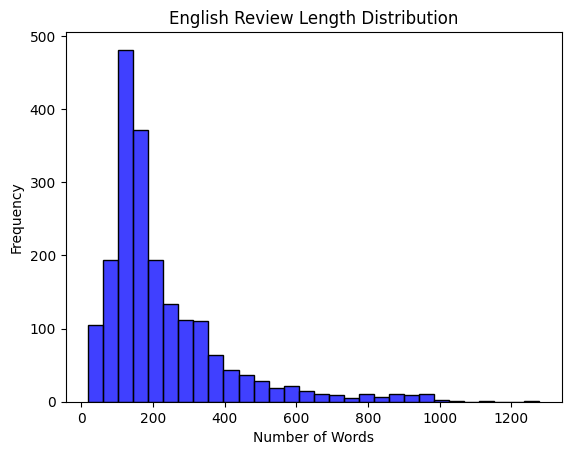

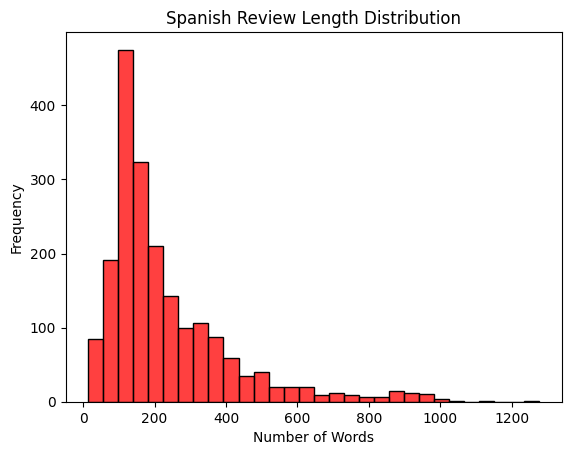

In [6]:
#showing the length distribution
sns.histplot(eng["review_length"], color="blue", bins=30)
plt.title("English Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

sns.histplot(spa["review_length"], color="red", bins=30)
plt.title("Spanish Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

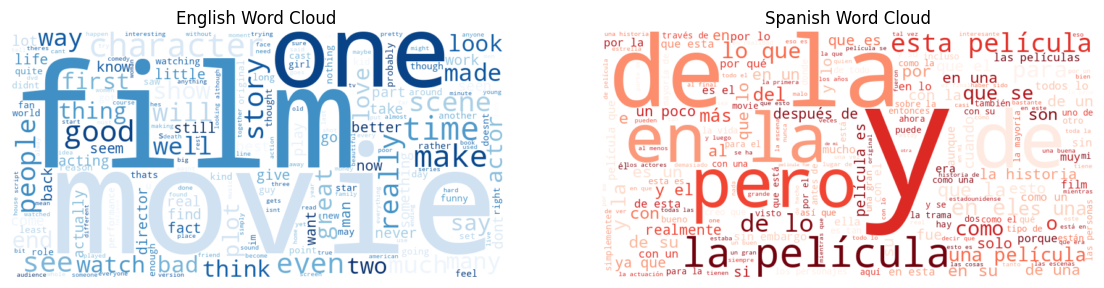

In [7]:
#creating a wordcloud for showing the most frequent usef words in each language
english_text = " ".join(eng["clean_text"].dropna().tolist())
spanish_text = " ".join(spa["clean_text"].dropna().tolist())

wordcloud_en = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="Blues"
).generate(english_text)

wordcloud_es = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200,
    colormap="Reds"
).generate(spanish_text)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_en, interpolation="bilinear")
plt.axis("off")
plt.title("English Word Cloud", fontsize=12)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_es, interpolation="bilinear")
plt.axis("off")
plt.title("Spanish Word Cloud", fontsize=12)

plt.show()


In [8]:
# Keep only the required columns
eng_final = eng[["clean_text", "sentiment"]]
spa_final = spa[["clean_text", "sentiment"]]

# Save the cleaned datasets to CSV files
eng_final.to_csv("../data/processed/01_cleaned_imdb_en.csv", index=False)
spa_final.to_csv("../data/processed/01_cleaned_imdb_es.csv", index=False)

print("✅ Cleaned datasets saved successfully.")


✅ Cleaned datasets saved successfully.
